In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("C:/Users/hp/Downloads/big_startup_secsees_dataset.csv/big_startup_secsees_dataset.csv")


In [3]:
print(data.head())
print(data.info())
print(data.describe())

                             permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
4       /organization/004-technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list funding_total_usd  \
0                                              Media          10000000   
1  Application Platforms|Real Time|Social Network...            700000   
2                                  Apps|Games|Mobile           3406878   
3                                        Curated Web           200

In [4]:
print(data.isnull().sum())

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64


In [5]:
data["name"].fillna("anonymous", inplace=True)


data["state_code"].fillna("unknown-state", inplace=True)
data["city"].fillna("unknown-city", inplace=True)
data["region"].fillna("unknown-region", inplace=True)

data["homepage_url"].fillna("Error-404", inplace=True)



In [6]:
data.groupby('country_code')['name'].nunique().sort_values(ascending=False).head(1)

country_code
USA    37489
Name: name, dtype: int64

In [7]:
data["country_code"].fillna("USA", inplace=True)

In [8]:
data1 = data.copy()

In [9]:
df1 = pd.DataFrame(data1)

In [10]:
df1.mode(numeric_only=False)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,Blink,Error-404,Software,-,operating,USA,CA,SF Bay Area,unknown-city,1.0,2012-01-01,2014-01-01,2014-01-01
1,/organization/-qounter,Karma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/organization/-the-one-of-them-inc-,Peach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,Roost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/organization/004-technologies,Spire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66364,/organization/zzzzapp-com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66365,/organization/Áeron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66366,/organization/Ôasys-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data["founded_at"].fillna("2012-01-01", inplace=True)

In [12]:
df1.isna().sum()

permalink                0
name                     0
homepage_url             0
category_list         3148
funding_total_usd        0
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

In [13]:
df1.dropna(inplace=True)

In [14]:
df1.isnull().sum()

permalink            0
name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64

In [15]:
df1.groupby('country_code')['name'].nunique().sort_values(ascending=False).head()

country_code
USA    33141
GBR     2762
CAN     1505
IND     1279
FRA      883
Name: name, dtype: int64

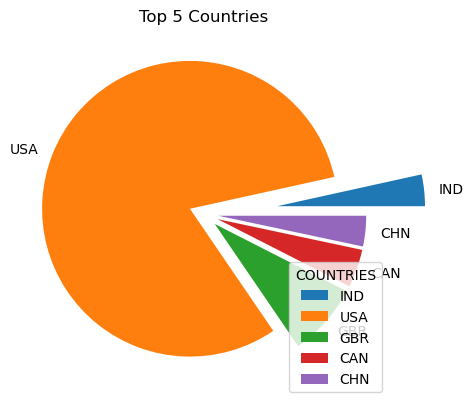

In [16]:
yarr = np.array([1596, 37489, 3684, 1925, 1543])

labelsarr = ['IND', 'USA', 'GBR', 'CAN', 'CHN']

explodearr = [0.5,0.1,0.1,0.1,0.1]

plt.pie(yarr, labels=labelsarr, explode=explodearr)

plt.legend( loc = "lower right" , title = "COUNTRIES")
plt.title("Top 5 Countries")

plt.show()

In [17]:
frequency1= df1['category_list'].value_counts().head(11)
print(frequency1)

category_list
Software               3136
Biotechnology          2431
E-Commerce              999
Mobile                  883
Curated Web             794
Clean Technology        731
Hardware + Software     699
Enterprise Software     663
Health Care             634
Games                   625
Advertising             557
Name: count, dtype: int64


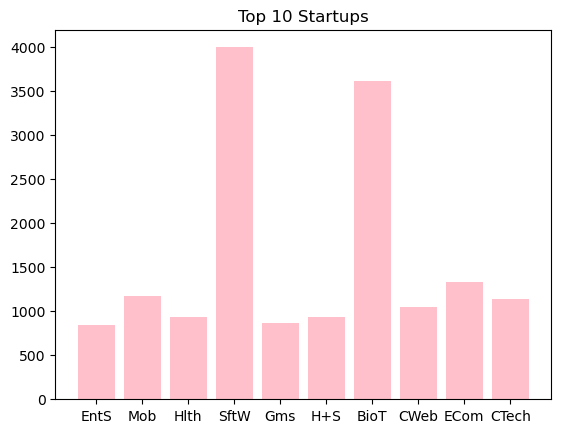

In [18]:
x = np.array([ 'EntS', 'Mob', 'Hlth', 'SftW', 'Gms', 'H+S', 'BioT', 'CWeb', 'ECom', 'CTech'])
y = np.array([845, 1177, 930, 3995, 862, 932, 3615, 1050, 1332, 1133])

plt.bar(x,y, color = 'pink', width= 0.8)
plt.title("Top 10 Startups")

plt.show()

In [20]:
df1['first_funding_at'] =  pd.to_datetime(df1['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df1['first_funding_at'].mean()
df1['last_funding_at'] =  pd.to_datetime(df1['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')

In [21]:
df1['diff_funding'] = df1['last_funding_at'] - df1['first_funding_at']

In [22]:
df1['diff_funding'].describe()

count                          49689
mean     399 days 14:20:53.251222612
std      739 days 14:11:35.737269576
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                549 days 00:00:00
max              33628 days 00:00:00
Name: diff_funding, dtype: object

In [23]:
df1['diff_funding_months'] = (df1['last_funding_at'] - df1['first_funding_at'])/np.timedelta64(1, 'm')

In [24]:
df1['diff_funding_months'].describe()

count    4.968900e+04
mean     5.754209e+05
std      1.065012e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.905600e+05
max      4.842432e+07
Name: diff_funding_months, dtype: float64

In [25]:
df1['founded_at'] =  pd.to_datetime(df1['founded_at'], format='%Y-%m-%d', errors = 'coerce')

In [26]:
df1['diff_first_funding_months'] = (df1['first_funding_at'] - df1['founded_at'])/np.timedelta64(1, 'm')

In [27]:
df1['diff_first_funding_months'].describe() 

count    4.968600e+04
mean     1.930863e+06
std      4.908091e+06
min     -4.759920e+07
25%      2.102400e+05
50%      7.430400e+05
75%      1.959840e+06
max      1.339963e+08
Name: diff_first_funding_months, dtype: float64

In [28]:
df1.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'diff_funding', 'diff_funding_months',
       'diff_first_funding_months'],
      dtype='object')

In [29]:
df1 = df1.drop( columns=['homepage_url','permalink', 'name', 'state_code', 'region', 'city'])

In [30]:
df1.isnull().sum()

category_list                0
funding_total_usd            0
status                       0
country_code                 0
funding_rounds               0
founded_at                   3
first_funding_at             2
last_funding_at              0
diff_funding                 2
diff_funding_months          2
diff_first_funding_months    5
dtype: int64

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49691 entries, 1 to 66366
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   category_list              49691 non-null  object         
 1   funding_total_usd          49691 non-null  object         
 2   status                     49691 non-null  object         
 3   country_code               49691 non-null  object         
 4   funding_rounds             49691 non-null  int64          
 5   founded_at                 49688 non-null  datetime64[ns] 
 6   first_funding_at           49689 non-null  datetime64[ns] 
 7   last_funding_at            49691 non-null  datetime64[ns] 
 8   diff_funding               49689 non-null  timedelta64[ns]
 9   diff_funding_months        49689 non-null  float64        
 10  diff_first_funding_months  49686 non-null  float64        
dtypes: datetime64[ns](3), float64(2), int64(1), object(4), time

In [33]:
df1.dropna(inplace=True)

In [34]:
df1.isnull().sum()

category_list                0
funding_total_usd            0
status                       0
country_code                 0
funding_rounds               0
founded_at                   0
first_funding_at             0
last_funding_at              0
diff_funding                 0
diff_funding_months          0
diff_first_funding_months    0
dtype: int64

In [35]:
df1 = df1.drop(columns=['founded_at', 'first_funding_at','last_funding_at'])

In [36]:
df1.dtypes

category_list                         object
funding_total_usd                     object
status                                object
country_code                          object
funding_rounds                         int64
diff_funding                 timedelta64[ns]
diff_funding_months                  float64
diff_first_funding_months            float64
dtype: object

In [38]:
df1['funding_total_usd'] =df1['funding_total_usd'].replace('-', '0')

In [39]:
df1['funding_total_usd'] = pd.to_numeric(df1['funding_total_usd'])

In [40]:
df1['funding_total_usd'].dtype

dtype('float64')

In [43]:
df1['diff_funding'] = pd.to_numeric(df1['diff_funding'])

In [45]:
df1.dtypes

category_list                 object
funding_total_usd            float64
status                        object
country_code                  object
funding_rounds                 int64
diff_funding                   int64
diff_funding_months          float64
diff_first_funding_months    float64
dtype: object

In [46]:
label_encoders = {}
categorical_columns = ['category_list', 'status', 'country_code']
for columns in categorical_columns:
    label_encoders[columns] = LabelEncoder()
    df1[columns] = label_encoders[columns].fit_transform(df1[columns])

df1


,category_list,funding_total_usd,status,country_code,funding_rounds,diff_funding,diff_funding_months,diff_first_funding_months
1,4211,700000.0,3,121,2,19612800000000000,326880.0,-269280.0
3,12730,2000000.0,3,21,1,0,0.0,637920.0
4,23070,0.0,3,121,1,0,0.0,2397600.0
6,7336,762851.0,3,18,2,8726400000000000,145440.0,6675840.0
7,2352,33600000.0,3,121,4,89856000000000000,1497600.0,1055520.0
...,...,...,...,...,...,...,...,...
66358,7336,15419877.0,1,82,4,161740800000000000,2695680.0,7362720.0
66361,7336,2686600.0,3,5,1,0,0.0,3196800.0
66362,2361,1120000.0,3,39,3,29203200000000000,486720.0,79200.0
66364,1840,114304.0,3,49,4,73526400000000000,1225440.0,-279360.0


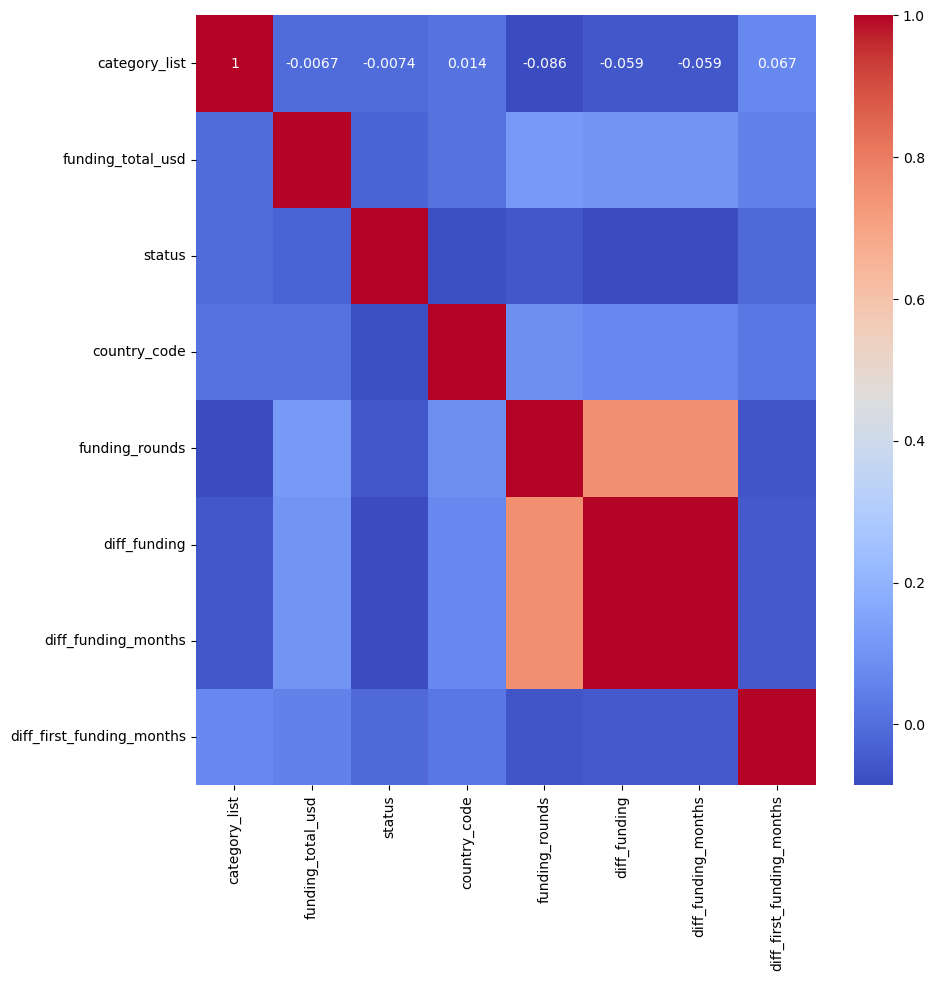

In [47]:
fig = plt.figure(figsize=(10,10))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm')

plt.show()

In [48]:
column_to_move = df1.pop("status")

# insert column with insert(location, column_name, column_value)

df1.insert(7, "status", column_to_move)

In [49]:
df1

,category_list,funding_total_usd,country_code,funding_rounds,diff_funding,diff_funding_months,diff_first_funding_months,status
1,4211,700000.0,121,2,19612800000000000,326880.0,-269280.0,3
3,12730,2000000.0,21,1,0,0.0,637920.0,3
4,23070,0.0,121,1,0,0.0,2397600.0,3
6,7336,762851.0,18,2,8726400000000000,145440.0,6675840.0,3
7,2352,33600000.0,121,4,89856000000000000,1497600.0,1055520.0,3
...,...,...,...,...,...,...,...,...
66358,7336,15419877.0,82,4,161740800000000000,2695680.0,7362720.0,1
66361,7336,2686600.0,5,1,0,0.0,3196800.0,3
66362,2361,1120000.0,39,3,29203200000000000,486720.0,79200.0,3
66364,1840,114304.0,49,4,73526400000000000,1225440.0,-279360.0,3


In [50]:
frequencie= df1['status'].value_counts().head(4)
print(frequencie)

status
3    40521
0     4268
1     3716
2     1181
Name: count, dtype: int64


In [51]:
df1 = df1.replace({'status':2},0)
df1 = df1.replace({'status':1},0)
df1 = df1.replace({'status':3},1)

In [52]:
df1

,category_list,funding_total_usd,country_code,funding_rounds,diff_funding,diff_funding_months,diff_first_funding_months,status
1,4211,700000.0,121,2,19612800000000000,326880.0,-269280.0,1
3,12730,2000000.0,21,1,0,0.0,637920.0,1
4,23070,0.0,121,1,0,0.0,2397600.0,1
6,7336,762851.0,18,2,8726400000000000,145440.0,6675840.0,1
7,2352,33600000.0,121,4,89856000000000000,1497600.0,1055520.0,1
...,...,...,...,...,...,...,...,...
66358,7336,15419877.0,82,4,161740800000000000,2695680.0,7362720.0,0
66361,7336,2686600.0,5,1,0,0.0,3196800.0,1
66362,2361,1120000.0,39,3,29203200000000000,486720.0,79200.0,1
66364,1840,114304.0,49,4,73526400000000000,1225440.0,-279360.0,1


In [53]:
x = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [54]:
x,y

(array([[ 4.21100e+03,  7.00000e+05,  1.21000e+02, ...,  1.96128e+16,
          3.26880e+05, -2.69280e+05],
        [ 1.27300e+04,  2.00000e+06,  2.10000e+01, ...,  0.00000e+00,
          0.00000e+00,  6.37920e+05],
        [ 2.30700e+04,  0.00000e+00,  1.21000e+02, ...,  0.00000e+00,
          0.00000e+00,  2.39760e+06],
        ...,
        [ 2.36100e+03,  1.12000e+06,  3.90000e+01, ...,  2.92032e+16,
          4.86720e+05,  7.92000e+04],
        [ 1.84000e+03,  1.14304e+05,  4.90000e+01, ...,  7.35264e+16,
          1.22544e+06, -2.79360e+05],
        [ 1.14450e+04,  1.81920e+04,  1.21000e+02, ...,  0.00000e+00,
          0.00000e+00,  5.25600e+05]]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [55]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(x,y)
print(X_new)

[[7.00000e+05 1.21000e+02 2.00000e+00 1.96128e+16 3.26880e+05]
 [2.00000e+06 2.10000e+01 1.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 1.21000e+02 1.00000e+00 0.00000e+00 0.00000e+00]
 ...
 [1.12000e+06 3.90000e+01 3.00000e+00 2.92032e+16 4.86720e+05]
 [1.14304e+05 4.90000e+01 4.00000e+00 7.35264e+16 1.22544e+06]
 [1.81920e+04 1.21000e+02 1.00000e+00 0.00000e+00 0.00000e+00]]


In [56]:
x

array([[ 4.21100e+03,  7.00000e+05,  1.21000e+02, ...,  1.96128e+16,
         3.26880e+05, -2.69280e+05],
       [ 1.27300e+04,  2.00000e+06,  2.10000e+01, ...,  0.00000e+00,
         0.00000e+00,  6.37920e+05],
       [ 2.30700e+04,  0.00000e+00,  1.21000e+02, ...,  0.00000e+00,
         0.00000e+00,  2.39760e+06],
       ...,
       [ 2.36100e+03,  1.12000e+06,  3.90000e+01, ...,  2.92032e+16,
         4.86720e+05,  7.92000e+04],
       [ 1.84000e+03,  1.14304e+05,  4.90000e+01, ...,  7.35264e+16,
         1.22544e+06, -2.79360e+05],
       [ 1.14450e+04,  1.81920e+04,  1.21000e+02, ...,  0.00000e+00,
         0.00000e+00,  5.25600e+05]])

In [57]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_new)
scaled_features

array([[-0.08233133,  0.64021838,  0.09003796, -0.23339917, -0.23339917],
       [-0.07547864, -1.91817325, -0.59098292, -0.54032193, -0.54032193],
       [-0.08602123,  0.64021838, -0.59098292, -0.54032193, -0.54032193],
       ...,
       [-0.08011738, -1.45766276,  0.77105885, -0.08331799, -0.08331799],
       [-0.0854187 , -1.20182359,  1.45207973,  0.61030041,  0.61030041],
       [-0.08592534,  0.64021838, -0.59098292, -0.54032193, -0.54032193]])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2,random_state=0)

classifiers = {
    'Logistic Regression' : LogisticRegression() ,
    'Decision Tree' : DecisionTreeClassifier() ,
    'Random Forest' : RandomForestClassifier() ,
    'Support Vector Machine' : SVC() ,
    'Naive Bayes' : GaussianNB(),
    'K-Nearest Neighbors' : KNeighborsClassifier()


}

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy:{accuracy*100:.2f}%")
    print(classification_report(y_test, y_pred))
    print(".........................................................................................................")

Confusion Matrix for Logistic Regression:
 [[  10 1819]
 [  15 8094]]
Logistic Regression Accuracy:81.55%
              precision    recall  f1-score   support

           0       0.40      0.01      0.01      1829
           1       0.82      1.00      0.90      8109

    accuracy                           0.82      9938
   macro avg       0.61      0.50      0.45      9938
weighted avg       0.74      0.82      0.73      9938

.........................................................................................................
Confusion Matrix for Decision Tree:
 [[ 313 1516]
 [ 962 7147]]
Decision Tree Accuracy:75.07%
              precision    recall  f1-score   support

           0       0.25      0.17      0.20      1829
           1       0.83      0.88      0.85      8109

    accuracy                           0.75      9938
   macro avg       0.54      0.53      0.53      9938
weighted avg       0.72      0.75      0.73      9938

........................................

In [60]:
best_classifier = max(results, key=results.get)
print(f"Best Classifier:{best_classifier} with Accuracy: {results[best_classifier]:.4f}")


Best Classifier:Support Vector Machine with Accuracy: 0.8160


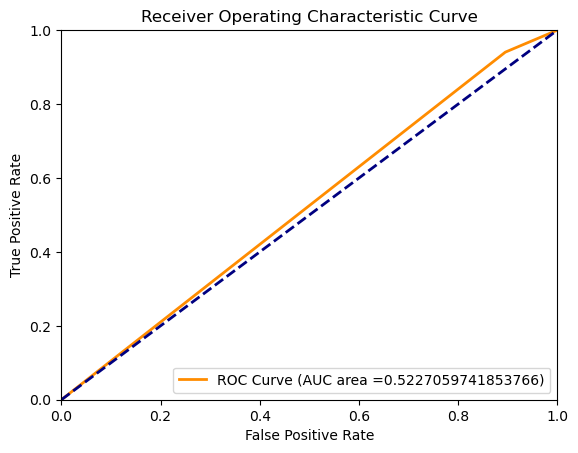

In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr,color = 'darkorange' , lw=2, label= f'ROC Curve (AUC area ={roc_auc})')
plt.plot([0,1] , [0,1] , color ='navy' ,lw = 2, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [62]:
from sklearn.ensemble import AdaBoostClassifier
base_dt = DecisionTreeClassifier(max_depth=5, random_state= 42)
adaboost_clf = AdaBoostClassifier(base_estimator= base_dt, n_estimators= 50, random_state=42)


In [63]:
adaboost_clf.fit(X_train,y_train)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         random_state=42),
                   random_state=42)

In [64]:
y_pred = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy:{accuracy:.4f}")
print("Confusion Matrix:\n" , conf_matrix)

Accuracy:0.8056
Confusion Matrix:
 [[  85 1744]
 [ 188 7921]]


In [65]:
adaboost_clf.feature_importances_

array([0.39462913, 0.0993347 , 0.08800793, 0.21751819, 0.20051005])

In [67]:
lis1 = df1.columns[:5]
lis1

Index(['category_list', 'funding_total_usd', 'country_code', 'funding_rounds',
       'diff_funding'],
      dtype='object')

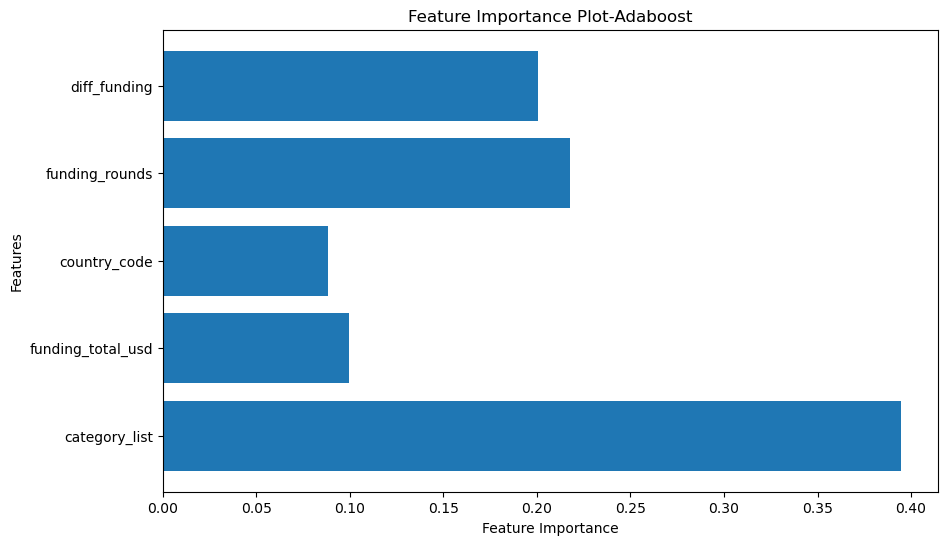

In [68]:
plt.figure(figsize=(10,6))
plt.barh(lis1, adaboost_clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot-Adaboost")
plt.show()